# Tests Boston

In [42]:
import pandas as pd
from sklearn import datasets
boston = datasets.load_boston()
df = pd.DataFrame(boston.data)
df.shape

(506, 13)

In [43]:
import numpy as np
df['13']=np.random.uniform(0, 100, df.shape[0]) # on ajoute une colonne inutile pour tester le programme

In [47]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np                     # IMPORTATION DES MODULES NÉCESSAIRES
import statsmodels.api as sm
from scipy import *

def selected_variables(Y,X,n,p):
# rho = ?
# N = ?
n = df.shape[0] # on rentrera la taille de notre échantillon
p = df.shape[1] # on rentrera le nombre de régresseurs

# ENTRER LA COLONNE À PRÉDIRE ICI 
Y = boston.target

# Initialisation des vecteurs
vecteur_theta = 0.5*np.ones(14)
mat_bernoulli = np.zeros((n,p))
for i in range(p):
    mat_bernoulli[:,i] = bernoulli.rvs(vecteur_theta[i], size=n)
t=0
new_theta = np.zeros((p))
mat_new_theta = np.ones((p))

while True:
    liste_aic = []
    indices_var = []
    liste_bon_indice = []
    u=[]
    for i in range(n): # on parcourt les rangs de la matrice
         # indices des variables que l'on sélectionne pour l'OLS
        indices_var = [idx for idx,e in enumerate(mat_bernoulli[i]) 
                       if e == 1]
        X_reg = df.iloc[:, indices_var]
        X = sm.add_constant(X_reg)
        model = sm.OLS(Y,X)
        results = model.fit() # execution de la régression
        liste_aic.append(results.aic) # on ajoute les AIC de chaque regression
    liste_aic_sorted = sorted(liste_aic)
    # maintenant, on va faire une liste de nouveaux paramètres pour
    # chaque colonne, ou on va faire la moyenne des 0 et des 1
    # lorsque l'on est sur une ligne de "bon" AIC
    for i in range(n): # liste des indices des 15 meilleurs AIC
        if liste_aic[i] in liste_aic_sorted[:20]:
            liste_bon_indice.append(i)
    for j in range(p):
        for i in liste_bon_indice:
            u.append(mat_bernoulli[i,j])
            new_theta[j] = np.mean(u)
            # on choisit les rho*N éléments que l'on considère les 'meilleurs'
    mat_new_theta = np.vstack((mat_new_theta,[new_theta]))
    # on rentre maintenant le critère d'arrêt
    if np.linalg.norm(mat_new_theta[t] - mat_new_theta[t-1])<1e-11:
        print("Le nombre d'itérations est "+ str(t)+"\n"+"Les paramètres de Bernoulli finaux sont : "+ str(mat_new_theta[t]))
        break
    else:
        for i in range(p):
            mat_bernoulli[:,i] = bernoulli.rvs(new_theta[i], size=n)
    t=t+1

Le nombre d'itérations est 53
Les paramètres de Bernoulli finaux sont : [1.         1.         1.         1.         1.         1.
 0.85714286 0.875      0.88888889 0.9        0.90909091 0.91666667
 0.92307692 0.92857143]


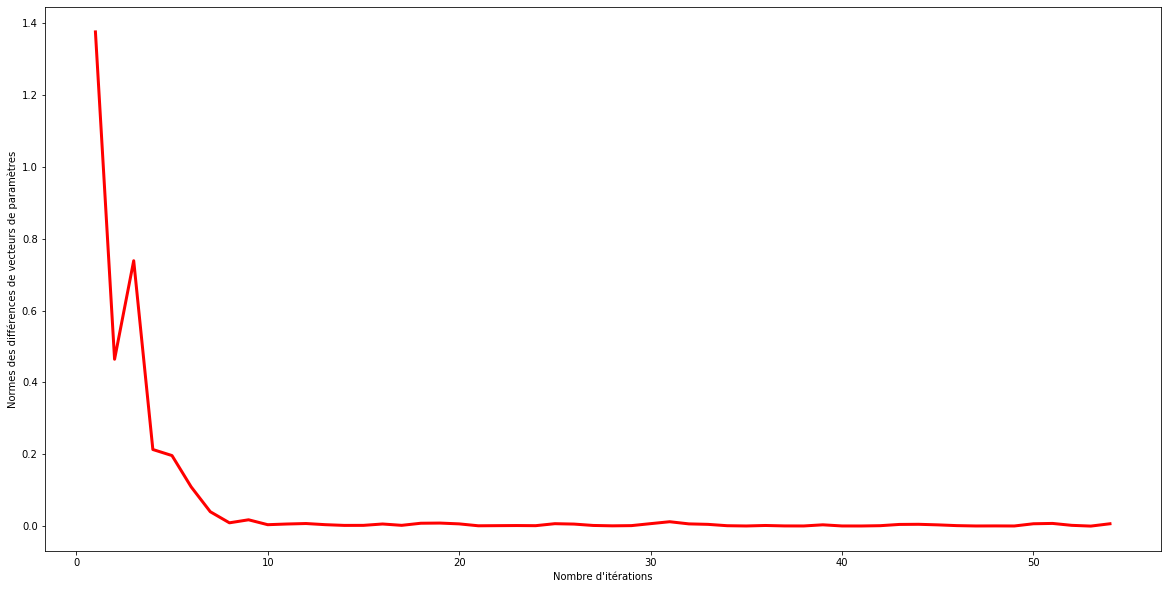

In [51]:
import matplotlib.pyplot as plt
normes = []
for i in range(1,mat_new_theta.shape[0]):
    normes.append(np.linalg.norm(mat_new_theta[i] - mat_new_theta[i-1]))
    
plt.figure(figsize=(20,10))
plt.plot(range(1,mat_new_theta.shape[0]),normes,"r", linewidth=3)
plt.ylabel('Normes des différences de vecteurs de paramètres')
plt.xlabel("Nombre d'itérations")
plt.show()

On a une convergence vers le même vecteur de paramètre : on ne conserve que les **6 premières variables**.

In [4]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np                     # IMPORTATION DES MODULES NÉCESSAIRES
import statsmodels.api as sm
from scipy import *

# Y : la colonne à prédire
# x : les colonnes pour prédire

def selected_variables(Y,x,nb_aic):
    n = x.shape[0] # on rentrera la taille de notre échantillon
    p = x.shape[1] # on rentrera le nombre de régresseurs
    # Initialisation des vecteurs
    vecteur_theta = 0.5*np.ones(p)
    mat_bernoulli = np.zeros((n,p))
    for i in range(p):
        mat_bernoulli[:,i] = bernoulli.rvs(vecteur_theta[i], size=n)
    t=0
    new_theta = np.zeros((p))
    mat_new_theta = np.ones((p))

    while True:
        liste_aic = []
        indices_var = []
        liste_bon_indice = []
        u=[]
        for i in range(n): # on parcourt les rangs de la matrice
             # indices des variables que l'on sélectionne pour l'OLS
            indices_var = [idx for idx,e in enumerate(mat_bernoulli[i]) 
                           if e == 1]
            X_reg = x.iloc[:, indices_var]
            X = sm.add_constant(X_reg)
            model = sm.OLS(Y,X)
            results = model.fit() # execution de la régression
            liste_aic.append(results.aic) # on ajoute les AIC de chaque regression
        liste_aic_sorted = sorted(liste_aic)
        # maintenant, on va faire une liste de nouveaux paramètres pour
        # chaque colonne, ou on va faire la moyenne des 0 et des 1
        # lorsque l'on est sur une ligne de "bon" AIC
        for i in range(n): # liste des indices des nb meilleurs AIC
            if liste_aic[i] in liste_aic_sorted[:nb_aic]:
                liste_bon_indice.append(i)
        for j in range(p):
            for i in liste_bon_indice:
                u.append(mat_bernoulli[i,j])
                new_theta[j] = np.mean(u)
                # on choisit les rho*N éléments que l'on considère les 'meilleurs'
        mat_new_theta = np.vstack((mat_new_theta,[new_theta]))
        # on rentre maintenant le critère d'arrêt
        # on rentre maintenant le critère d'arrêt
        if np.linalg.norm(mat_new_theta[t] - mat_new_theta[t-1])<1e-11:
            print("Le nombre d'itérations est "+ str(t)+"\n"+"Les paramètres de Bernoulli finaux sont : "+ str(mat_new_theta[t]))
            break
        else:
            for i in range(p):
                mat_bernoulli[:,i] = bernoulli.rvs(new_theta[i], size=n)
        t=t+1

# Tests Diabete

## Test pour 30 meilleurs aic et critère d'arrêt 1e-11

In [ ]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np                     # IMPORTATION DES MODULES NÉCESSAIRES
import statsmodels.api as sm
from scipy import *

# rho = ?
# N = ?
n = 442 # on rentrera la taille de notre échantillon
p = 10 # on rentrera le nombre de régresseurs

# ENTRER LA COLONNE À PRÉDIRE ICI 
Y = diabete.target

# Initialisation des vecteurs
vecteur_theta = np.random.rand(10)
mat_bernoulli = np.zeros((n,p))
for i in range(p):
    mat_bernoulli[:,i] = bernoulli.rvs(vecteur_theta[i], size=n)
t=0
new_theta = np.zeros((p))
mat_new_theta = np.ones((p))

In [453]:
while True:
    liste_aic = []
    indices_var = []
    liste_bon_indice = []
    u=[]
    for i in range(n): # on parcourt les rangs de la matrice
         # indices des variables que l'on sélectionne pour l'OLS
        indices_var = [idx for idx,e in enumerate(mat_bernoulli[i]) 
                       if e == 1]
        X_reg = df.iloc[:, indices_var]
        X = sm.add_constant(X_reg)
        model = sm.OLS(Y,X)
        results = model.fit() # execution de la régression
        liste_aic.append(results.aic) # on ajoute les AIC de chaque regression
    liste_aic_sorted = sorted(liste_aic)
    # maintenant, on va faire une liste de nouveaux paramètres pour
    # chaque colonne, ou on va faire la moyenne des 0 et des 1
    # lorsque l'on est sur une ligne de "bon" AIC
    for i in range(n): # liste des indices des 20 meilleurs AIC
        if liste_aic[i] in liste_aic_sorted[:30]:
            liste_bon_indice.append(i)
    for j in range(p):
        for i in liste_bon_indice:
            u.append(mat_bernoulli[i,j])
            new_theta[j] = np.mean(u)
            # on choisit les rho*N éléments que l'on considère les 'meilleurs'
    mat_new_theta = np.vstack((mat_new_theta,[new_theta]))
    # on rentre maintenant le critère d'arrêt
    if np.linalg.norm(mat_new_theta[t] - mat_new_theta[t-1])<1e-11:
        print(mat_new_theta[t])
        break
    else:
        for i in range(p):
            mat_bernoulli[:,i] = bernoulli.rvs(new_theta[i], size=n)
    t=t+1

KeyboardInterrupt: 

On a arrêté le programme car il mettait trop de temps à tourner : en effet, on peut voir ci-dessus que le programme en était à sa 17544e itération. ON va alors imposer un critère d'itérations maximales atteint, et peut-être changer la le critère d'arrêt et le nombre d'AIC sélectionnés. Voyons voir pour l'instant à quoi ressemble nos sorties finales.

In [455]:
mat_new_theta.shape

(17554, 10)

In [456]:
m = mat_new_theta # on stocke dans une matrice
m[17553]

array([0.        , 0.5       , 0.66666667, 0.75      , 0.7952381 ,
       0.79365079, 0.7755102 , 0.74404762, 0.77248677, 0.75952381])

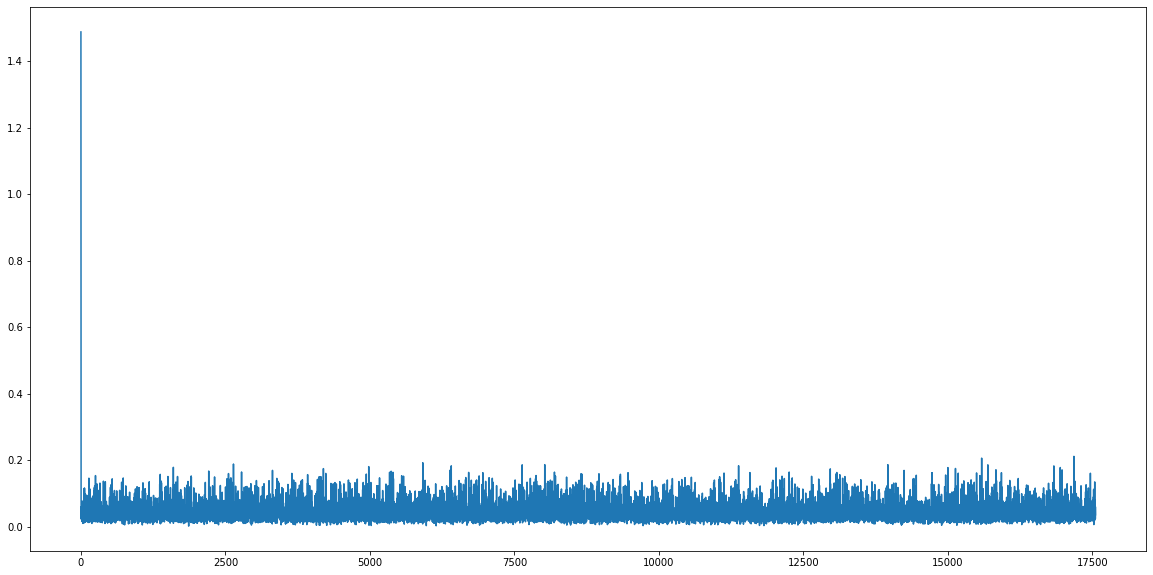

In [462]:
normes = []
for i in range(1,m.shape[0]):
    normes.append(np.linalg.norm(m[i] - m[i-1]))
    
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(range(1,m.shape[0]),normes)
plt.show()

In [463]:
print(min(normes))

0.0019201992585263948


## Test pour 20 meilleurs AIC et critère d'arrêt 1e-9

In [443]:
# on obtient [0.         0.5        0.66666667      0.75       0.8        0.82575758
 # 0.75974026 0.76704545 0.79292929 0.76818182] avec un critère d'arrêt de 1e-9
mat_new_theta.shape

(9015, 10)

Ici on voit qu'il nous a fallu 9015 itérations pour aboutir à un résultat que l'on considère comme convergent vers des paramètres de Bernoulli finaux. Dans notre cas, on ne choisit donc plus que les variables numéro 4,5,7,8 et 9 (notre index des variables commence par 0). Notre programme nous permet donc de rejeter les variables inutiles facilement, mais sachant qu'on ne peut les considérer comme telles à première vue. L'algorithme fonctionne donc pour la sélection de variables. 

## Test pour 15 meilleurs AIC et critère d'arrêt 1e-6

In [465]:
import statsmodels.api as sm
from scipy import *
# rho = ?
# N = ?
n = 442 # on rentrera la taille de notre échantillon
p = 10 # on rentrera le nombre de régresseurs

# ENTRER LA COLONNE À PRÉDIRE ICI 
Y = diabete.target

# Initialisation des vecteurs
vecteur_theta = np.random.rand(10)
mat_bernoulli = np.zeros((n,p))
for i in range(p):
    mat_bernoulli[:,i] = bernoulli.rvs(vecteur_theta[i], size=n)
t=0
new_theta = np.zeros((p))
mat_new_theta = np.ones((p))

while True:
    liste_aic = []
    indices_var = []
    liste_bon_indice = []
    u=[]
    for i in range(n): # on parcourt les rangs de la matrice
         # indices des variables que l'on sélectionne pour l'OLS
        indices_var = [idx for idx,e in enumerate(mat_bernoulli[i]) 
                       if e == 1]
        X_reg = df.iloc[:, indices_var]
        X = sm.add_constant(X_reg)
        model = sm.OLS(Y,X)
        results = model.fit() # execution de la régression
        liste_aic.append(results.aic) # on ajoute les AIC de chaque regression
    liste_aic_sorted = sorted(liste_aic)
    # maintenant, on va faire une liste de nouveaux paramètres pour
    # chaque colonne, ou on va faire la moyenne des 0 et des 1
    # lorsque l'on est sur une ligne de "bon" AIC
    for i in range(n): # liste des indices des 15 meilleurs AIC
        if liste_aic[i] in liste_aic_sorted[:15]:
            liste_bon_indice.append(i)
    for j in range(p):
        for i in liste_bon_indice:
            u.append(mat_bernoulli[i,j])
            new_theta[j] = np.mean(u)
            # on choisit les rho*N éléments que l'on considère les 'meilleurs'
    mat_new_theta = np.vstack((mat_new_theta,[new_theta]))
    # on rentre maintenant le critère d'arrêt
    if np.linalg.norm(mat_new_theta[t] - mat_new_theta[t-1])<1e-6:
        print(mat_new_theta[t])
        break
    else:
        for i in range(p):
            mat_bernoulli[:,i] = bernoulli.rvs(new_theta[i], size=n)
    t=t+1

[0.         0.5        0.66666667 0.75       0.8        0.82352941
 0.7394958  0.71323529 0.74509804 0.72352941]


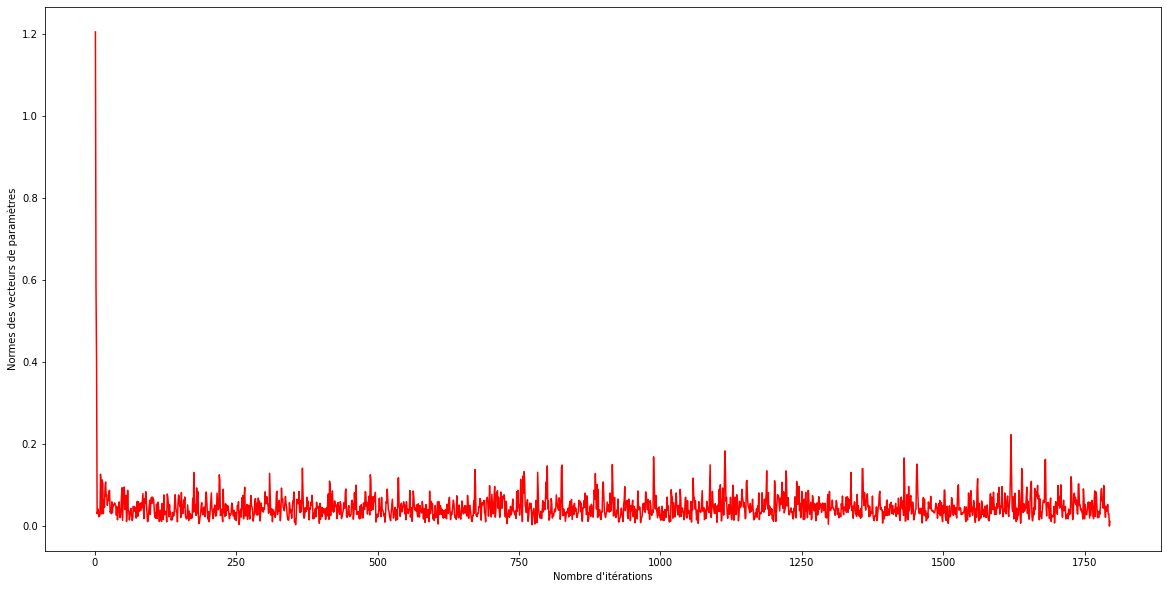

In [466]:
import matplotlib.pyplot as plt
normes = []
for i in range(1,mat_new_theta.shape[0]):
    normes.append(np.linalg.norm(mat_new_theta[i] - mat_new_theta[i-1]))
    
plt.figure(figsize=(20,10))
plt.plot(range(1,mat_new_theta.shape[0]),normes,"r")
plt.ylabel('Normes des vecteurs de paramètres')
plt.xlabel("Nombre d'itérations")
plt.show()

On retrouve de même un vecteur de paramètres finaux qui est ressemblant à celui des deux tests précédemment effectués.

# Test base finale

In [11]:
import numpy as np
from sklearn import datasets
import pandas as pd
from statsmodels.api import OLS
from itertools import combinations
from time import time
import matplotlib.pyplot as plt
from math import *
from random import randint

def gen_data(n_samples = 1000, n_features = 10,n_informative = 5, noise = 1, coef = True, random_state = 2020):
    #We set the random_state to get reproductible results
    data, y, coef = datasets.make_regression(n_samples = n_samples, #The number of samples
                                             n_features = n_features, # The number of features
                                             n_informative = n_informative, # the number of features used to build the linear model used to generate the output
                                             noise = noise, #The standard deviation of the gaussian noise applied to the output
                                             coef = coef, #If True, the coefficients of the underlying linear model are returned.
                                            random_state = random_state #Determines random number generation for dataset creation.
                                            )
    X = pd.DataFrame(data)
    Y = pd.DataFrame(y)
    beta_true = pd.DataFrame(coef)
    
    return X,Y,beta_true

X, y, beta_true = gen_data()

In [9]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np                     # IMPORTATION DES MODULES NÉCESSAIRES
import statsmodels.api as sm
from scipy import *

# Y : la colonne à prédire
# x : les colonnes pour prédire

def selected_variables(Y,x,nb_aic):
    n = x.shape[0] # on rentrera la taille de notre échantillon
    p = x.shape[1] # on rentrera le nombre de régresseurs
    # Initialisation des vecteurs
    normes = []
    vecteur_theta = 0.5*np.ones(p)
    mat_bernoulli = np.zeros((n,p))
    for i in range(p):
        mat_bernoulli[:,i] = bernoulli.rvs(vecteur_theta[i], size=n)
    t=0
    new_theta = np.zeros((p))
    mat_new_theta = np.ones((p))

    while True:
        liste_aic = []
        indices_var = []
        liste_bon_indice = []
        u=[]
        for i in range(n): # on parcourt les rangs de la matrice
             # indices des variables que l'on sélectionne pour l'OLS
            indices_var = [idx for idx,e in enumerate(mat_bernoulli[i]) 
                           if e == 1]
            X_reg = x.iloc[:, indices_var]
            X = sm.add_constant(X_reg)
            model = sm.OLS(Y,X)
            results = model.fit() # execution de la régression
            liste_aic.append(results.aic) # on ajoute les AIC de chaque regression
        liste_aic_sorted = sorted(liste_aic)
        # maintenant, on va faire une liste de nouveaux paramètres pour
        # chaque colonne, ou on va faire la moyenne des 0 et des 1
        # lorsque l'on est sur une ligne de "bon" AIC
        for i in range(n): # liste des indices des nb meilleurs AIC
            if liste_aic[i] in liste_aic_sorted[:nb_aic]:
                liste_bon_indice.append(i)
        for j in range(p):
            for i in liste_bon_indice:
                u.append(mat_bernoulli[i,j])
                new_theta[j] = np.mean(u)
                # on choisit les rho*N éléments que l'on considère les 'meilleurs'
        mat_new_theta = np.vstack((mat_new_theta,[new_theta]))
        # on rentre maintenant le critère d'arrêt
        # on rentre maintenant le critère d'arrêt
        if np.linalg.norm(mat_new_theta[t] - mat_new_theta[t-1])<1e-11:
            for i in range(1,mat_new_theta.shape[0]):
                normes.append(np.linalg.norm(mat_new_theta[i] - mat_new_theta[i-1]))
            print("Le nombre d'itérations est "+ str(t)+"\n"+"Les paramètres de Bernoulli finaux sont : "+ str(mat_new_theta[t]))
            plt.figure(figsize=(20,10))
            plt.plot(range(1,mat_new_theta.shape[0]),normes,"r")
            plt.ylabel('Normes des vecteurs de paramètres')
            plt.xlabel("Nombre d'itérations")
            plt.show()
            break
        else:
            for i in range(p):
                mat_bernoulli[:,i] = bernoulli.rvs(new_theta[i], size=n)
        t=t+1
        
        

Le nombre d'itérations est 16
Les paramètres de Bernoulli finaux sont : [1.         1.         1.         1.         0.8        0.66666667
 0.71428571 0.75       0.66666667 0.7       ]


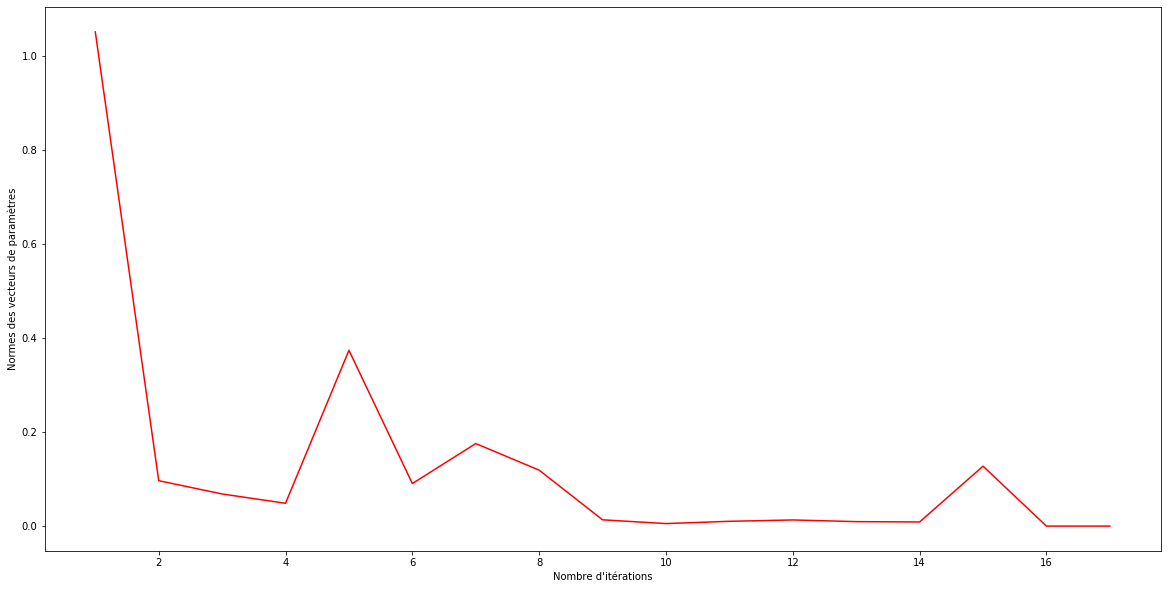

In [10]:
selected_variables(y,X,10)

In [6]:
selected_variables(y,X,15)

Le nombre d'itérations est 80
Les paramètres de Bernoulli finaux sont : [1.         1.         1.         1.         0.8        0.66666667
 0.71428571 0.75       0.74074074 0.76666667]


In [7]:
selected_variables(y,X,40)

Le nombre d'itérations est 1468
Les paramètres de Bernoulli finaux sont : [1.         1.         1.         1.         1.         0.83333333
 0.85714286 0.875      0.87606838 0.88846154]
